# Gender Recognition from voice
#By- Aarush Kumar
#Dated: October 20,2021

In [1]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/634/1*RTYreJ-PHBj2S33Eif2acA.jpeg')

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

In [3]:
df = pd.read_csv('/home/aarush100616/Downloads/Projects/Voice Gender Recog/Data/voice.csv')

In [4]:
df

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0      274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1      634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2     1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3        4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4        4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   
...           ...       ...       ...  ...       ...       ...       ...   
3163     6.630383  0.962934  0.763182  ...  0.131884  0.182790  0.083770   
3164     2.503954  0.960716  0.709570  ...  0.116221  0.188980  0.034409   
3165     6.604509  0.946854  0.654196  ...  0.142056  0.209918  0.039506   
3166     5.388298  0.950436  0.675470  ...  0.143659  0.172375  0.034483   
3167     5.769115  0.938829  0.601529  ...  0.165509  0.185607  0.062257   

        maxfun   meandom    mindom    maxdom   dfrange   modindx   label  
0     0.275862  0.007812  0.007812  0.007812  0.000000  0.000000    male  
1     0.250000  0.009014  0.007812  0.054688  0.046875  0.052632    male  
2     0.271186  0.007990  0.007812  0.015625  0.007812  0.046512    male  
3     0.250000  0.201497  0.007812  0.562500  0.554688  0.247119    male  
4     0.266667  0.712812  0.007812  5.484375  5.476562  0.208274    male  
...        ...       ...       ...       ...       ...       ...     ...  
3163  0.262295  0.832899  0.007812  4.210938  4.203125  0.161929  female  
3164  0.275862  0.909856  0.039062  3.679688  3.640625  0.277897  female  
3165  0.275862  0.494271  0.007812  2.937500  2.929688  0.194759  female  
3166  0.250000  0.791360  0.007812  3.593750  3.585938  0.311002  female  
3167  0.271186  0.227022  0.007812  0.554688  0.546875  0.350000  female  

[3168 rows x 21 columns]

In [5]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [6]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [7]:
df.describe()

meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163662     0.041954     0.169593     0.111087     0.208747   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
75%       0.199146     0.067020     0.210618     0.175939     0.243660   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.084309     3.140168    36.568461     0.895127     0.408216   
std       0.042783     4.240529   134.928661     0.044980     0.177521   
min       0.014558     0.141735     2.068455     0.738651     0.036876   
25%       0.042560     1.649569     5.669547     0.861811     0.258041   
50%       0.094280     2.197101     8.318463     0.901767     0.396335   
75%       0.114175     2.931694    13.648905     0.928713     0.533676   
max       0.252225    34.725453  1309.612887     0.981997     0.842936   

              mode     centroid      meanfun       minfun       maxfun  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.165282     0.180907     0.142807     0.036802     0.258842   
std       0.077203     0.029918     0.032304     0.019220     0.030077   
min       0.000000     0.039363     0.055565     0.009775     0.103093   
25%       0.118016     0.163662     0.116998     0.018223     0.253968   
50%       0.186599     0.184838     0.140519     0.046110     0.271186   
75%       0.221104     0.199146     0.169581     0.047904     0.277457   
max       0.280000     0.251124     0.237636     0.204082     0.279114   

           meandom       mindom       maxdom      dfrange      modindx  
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000  
mean      0.829211     0.052647     5.047277     4.994630     0.173752  
std       0.525205     0.063299     3.521157     3.520039     0.119454  
min       0.007812     0.004883     0.007812     0.000000     0.000000  
25%       0.419828     0.007812     2.070312     2.044922     0.099766  
50%       0.765795     0.023438     4.992188     4.945312     0.139357  
75%       1.177166     0.070312     7.007812     6.992188     0.209183  
max       2.957682     0.458984    21.867188    21.843750     0.932374

In [8]:
df.describe().T

count       mean         std       min       25%       50%  \
meanfreq  3168.0   0.180907    0.029918  0.039363  0.163662  0.184838   
sd        3168.0   0.057126    0.016652  0.018363  0.041954  0.059155   
median    3168.0   0.185621    0.036360  0.010975  0.169593  0.190032   
Q25       3168.0   0.140456    0.048680  0.000229  0.111087  0.140286   
Q75       3168.0   0.224765    0.023639  0.042946  0.208747  0.225684   
IQR       3168.0   0.084309    0.042783  0.014558  0.042560  0.094280   
skew      3168.0   3.140168    4.240529  0.141735  1.649569  2.197101   
kurt      3168.0  36.568461  134.928661  2.068455  5.669547  8.318463   
sp.ent    3168.0   0.895127    0.044980  0.738651  0.861811  0.901767   
sfm       3168.0   0.408216    0.177521  0.036876  0.258041  0.396335   
mode      3168.0   0.165282    0.077203  0.000000  0.118016  0.186599   
centroid  3168.0   0.180907    0.029918  0.039363  0.163662  0.184838   
meanfun   3168.0   0.142807    0.032304  0.055565  0.116998  0.140519   
minfun    3168.0   0.036802    0.019220  0.009775  0.018223  0.046110   
maxfun    3168.0   0.258842    0.030077  0.103093  0.253968  0.271186   
meandom   3168.0   0.829211    0.525205  0.007812  0.419828  0.765795   
mindom    3168.0   0.052647    0.063299  0.004883  0.007812  0.023438   
maxdom    3168.0   5.047277    3.521157  0.007812  2.070312  4.992188   
dfrange   3168.0   4.994630    3.520039  0.000000  2.044922  4.945312   
modindx   3168.0   0.173752    0.119454  0.000000  0.099766  0.139357   

                75%          max  
meanfreq   0.199146     0.251124  
sd         0.067020     0.115273  
median     0.210618     0.261224  
Q25        0.175939     0.247347  
Q75        0.243660     0.273469  
IQR        0.114175     0.252225  
skew       2.931694    34.725453  
kurt      13.648905  1309.612887  
sp.ent     0.928713     0.981997  
sfm        0.533676     0.842936  
mode       0.221104     0.280000  
centroid   0.199146     0.251124  
meanfun    0.169581     0.237636  
minfun     0.047904     0.204082  
maxfun     0.277457     0.279114  
meandom    1.177166     2.957682  
mindom     0.070312     0.458984  
maxdom     7.007812    21.867188  
dfrange    6.992188    21.843750  
modindx    0.209183     0.932374

In [9]:
from IPython.core.display import HTML 
display(HTML(df.head(10).to_html()))

In [10]:
df['label'] = df['label'].map({"male":0,"female":1})

In [11]:
y = df['label'].values
X = df.drop(['label'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense(1, activation="sigmoid"))

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
train = model.fit(X_train , y_train , validation_data=(X_test,y_test), epochs=100, verbose=1)

Epoch 1/100
80/80 [==============================] - 1s 4ms/step - loss: 3.0226 - accuracy: 0.4976 - val_loss: 2.9952 - val_accuracy: 0.5095
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 1.7794 - accuracy: 0.4980 - val_loss: 1.6251 - val_accuracy: 0.5110
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.9754 - accuracy: 0.5055 - val_loss: 0.9098 - val_accuracy: 0.4700
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.7094 - accuracy: 0.5178 - val_loss: 0.7185 - val_accuracy: 0.4984
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5418 - val_loss: 0.7157 - val_accuracy: 0.5237
Epoch 6/100
80/80 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.5556 - val_loss: 0.6905 - val_accuracy: 0.5347
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5702 - val_loss: 0.6794 - val_accuracy: 0.5410
Epoch 8/100
8

In [16]:
y_ann = model.predict(X_test)

In [17]:
y_ann = y_ann.flatten()

In [18]:
y_ann

array([0.87151814, 0.26364148, 0.17248812, 0.9309279 , 0.76976955,
       0.8285401 , 0.8671216 , 0.7704112 , 0.1327371 , 0.42898923,
       0.5715429 , 0.46173954, 0.39764065, 0.9135506 , 0.8047512 ,
       0.04300258, 0.14494964, 0.36917827, 0.2675168 , 0.72620535,
       0.70473087, 0.41687566, 0.8558622 , 0.34092188, 0.46062776,
       0.5052312 , 0.45725933, 0.5138382 , 0.27329302, 0.12116832,
       0.8238101 , 0.7898898 , 0.398709  , 0.19239074, 0.80762666,
       0.12083888, 0.7392844 , 0.4173586 , 0.59927684, 0.42886764,
       0.18837452, 0.31544137, 0.23465484, 0.29762906, 0.7280606 ,
       0.8566338 , 0.44340825, 0.86013126, 0.27180687, 0.47708037,
       0.8892083 , 0.47724402, 0.1707181 , 0.27078038, 0.2878598 ,
       0.34744507, 0.32324004, 0.36175132, 0.40925002, 0.8456079 ,
       0.38667053, 0.4782415 , 0.5082593 , 0.45874095, 0.8850204 ,
       0.2882545 , 0.7695459 , 0.86950606, 0.76329947, 0.16155154,
       0.34464133, 0.5262843 , 0.82853216, 0.41698447, 0.37769

In [19]:
for y_a in y_ann :
    if y_a > 0.5 :
        y_a = 1
    else :
        y_a =0

In [20]:
y_ann = np.round(y_ann)

In [21]:
y_ann

array([1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1.

In [22]:
accuracy_score(y_test, y_ann)

0.7854889589905363

In [23]:
confusion_matrix(y_test, y_ann)

array([[264,  59],
       [ 77, 234]])

In [24]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

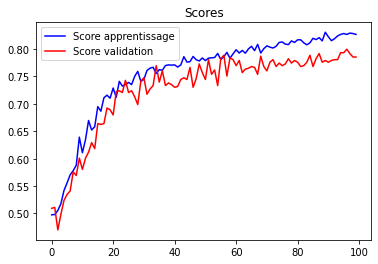

In [25]:
plot_scores(train)